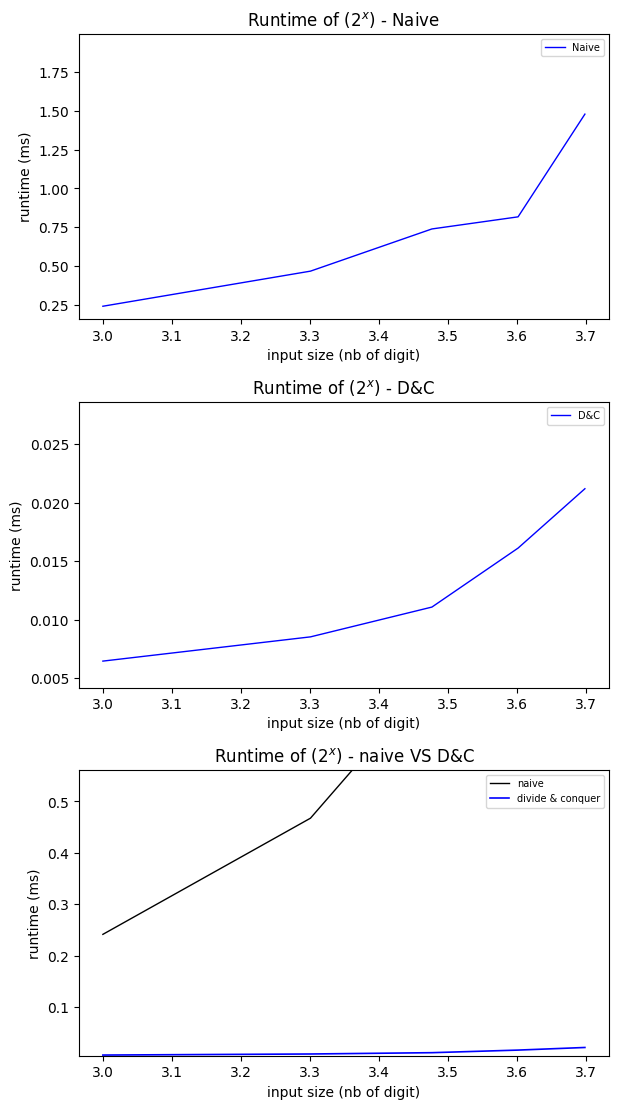

In [1]:
from time import time
import matplotlib.pyplot as plt
from random import randint

def runtime(f, args, unpack: bool = True, needs_use_of_timeit: bool = False, num:int = 1):
    """ Takes a function f and an argument arg, and returns the time (in ms) it takes to run f(arg)
    f: the function to be timed
    args: the arguments to pass to the function
    ! needs_use_of_timeit: For Exp the delta in runtimes is too short and oftens ends up being 0. 
                ! Since the problem seemed to be really common among everyone, and that implementing a timing function 
                  ! is not really the goal of this TP, I decided to use the library timeit to solve that problem.
    num: If needs_use_of_timeit is true, then num is the number of time f(arg) is executed. 
            Higher num-value means statistics more relevant and closer to reality.
    """
    if needs_use_of_timeit:
        from timeit import timeit
        #* number of time code is executed. Higher num-value means statistics more relevant and closer to reality 
        #delta_time = timeit(lambda: f(*arg), number=num) * (1000/num) if unpack else timeit(lambda: f(arg), number=num) * (1000/num)
        return  timeit(lambda: f(*args), number=num) * (1000/num) if unpack else timeit(lambda: f(args), number=num) * (1000/num) 
        # *1000 to convert to ms.

    else:
        before = time()
        f(*args) if (unpack) else f(args)
        after = time()
        delta_time = after - before
        return delta_time

def runtime_arr(f, argArray, unpack: bool = True, needs_use_of_timeit: bool = False, num:int = 1): 
    """ See "runtime()" function above for explaination """
    return [runtime(f, arg, unpack, needs_use_of_timeit, num) for arg in argArray]

def plotVS(subp_idx, plot_x, plot_f1, plot_f2, title: str, xlabel: str, ylabel: str, f1Label: str, f2Label: str):
    """Plots two functions against each other.  
    - plot_x: the x-axis values
    - plot_f1: the y-values of the first function
    - plot_f2: the y-values of the second function
    - title: the title of the plot
    - xlabel: the label of the x-axis
    - ylabel: the label of the y-axis
    - f1Label: the label of the first function
    - f2Label: the label of the second function
    """
    
    plt.subplot(3,1, subp_idx)
    plt.tight_layout()
    plt.title(title)
    m1, m2, gap = min(plot_f2), min(plot_f1[1:]), 0.2
    plt.ylim(m1 - gap * m1, m2 + gap * m2)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.plot(plot_x, plot_f1, '-k', label=f1Label, linewidth=1)
    plt.plot(plot_x, plot_f2, '-b', label=f2Label, linewidth=1.2)
    plt.legend(prop={'size': 7})
    plt.legend(fontsize=7)

def plot_solo(subp_idx, plot_x, plot_f, title: str, xlabel: str, ylabel: str, fLabel: str):
    """Plots two functions against each other.  
    - plot_x: the x-axis values
    - plot_f: the y-values of the function
    - title: the title of the plot
    - xlabel: the label of the x-axis
    - ylabel: the label of the y-axis
    - fLabel: the label of the function
    """
    plt.subplot(3, 1, subp_idx)
    plt.tight_layout(pad=5)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    m, M, gap = min(plot_f), max(plot_f), 0.35
    plt.ylim(m - gap*m, M + gap*M)
    plt.plot(plot_x, plot_f, '-b', label=fLabel, linewidth=1)
    plt.legend(prop={'size': 7})
    plt.legend(fontsize=7)



########################### Exercice 2 ###########################
def exp_naive(base, p):
    """Naive implementation of exponentiation"""
    pr = 1
    for _ in range(p):
        pr *= base
    return pr
    # complexity theta(n*f) where f is the complexity of the multiplication of pr by base (at least Omega(n)).


def exp_dandc(base, p):
    if p == 0: return 1
    if p == 1: return base
    from math import log2
    """Divide and Conquer implementation of exponentiation"""
    def toBin(x): return bin(x)[2:][::-1]
    binP, i0, stop = toBin(p),  1, int(log2(p))

    def exp_rec(prod, crt_pow, i):
        """ summ : contains the sum of the base^(2^i)
        crt_pow: the current power of k (should be equal to k^(2^i))
        binP: contains the binary representation of k (as an array)
        i : the current step
        stop: the max number of step i.e. stopping condition is "i >= stop" (stop := floor(log_2(p)))
        """
        if i > stop: return prod
        crt_pow = crt_pow * crt_pow
        if binP[i] == '1': prod *= crt_pow
        return exp_rec(prod, crt_pow, i+1)

    prod0, pow_0 = 1, base
    if (binP[0] == '1'): prod0 = base
    # if P is odd then we have to multiply by base at the beginning => hence why we start our product at base
    return exp_rec(prod0, pow_0, i0)


def compare_exp():
    """Compare runtimes of the naive and D&C algorithms using matplotlib"""
    from math import log10
    from time import time
    import matplotlib.pyplot as plt
    num = 1000
    args = [(2, i) for i in range(1000, 6000, 1000)]
    plot_x = [log10(x) for x in range(1000, 6000, 1000)]
    plot_y_naive = runtime_arr(exp_naive,  args, needs_use_of_timeit=True, num=num)
    plot_y_dandc = runtime_arr(exp_dandc, args, needs_use_of_timeit=True, num=num)
    titles = [r"Runtime of $(2^x)$ - Naive", r"Runtime of $(2^x)$ - D&C", r"Runtime of $(2^x)$ - naive VS D&C"]
    xlabel, ylabel = "input size (nb of digit)", "runtime (ms)"
    """ print("x_values:", plot_x)
    print("pairs:", args)
    print("y_naive:", plot_y_naive)
    print("y_dandc", plot_y_dandc) """

    plt.figure().set_figheight(11)
    plot_solo(1, plot_x, plot_y_naive, titles[0], xlabel, ylabel, "Naive")
    plot_solo(2, plot_x, plot_y_dandc, titles[1], xlabel, ylabel, "D&C")
    
    plotVS(3, plot_x, plot_y_naive, plot_y_dandc, titles[2], xlabel, ylabel, "naive", "divide & conquer")


# TODO: Uncomment to see comparison
compare_exp()